In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_addons as tfa 
import pandas as pd 
import itertools

import matplotlib.pyplot as plt
import numpy as np


AUTOTUNE = tf.data.experimental.AUTOTUNE
print(tf.__version__)

2.9.2


In [2]:
SPECTRAL_FILENAMES = tf.io.gfile.glob(str('Spectral_64.tfrec'))
print(f'Spectral TFRecord Files: {len(SPECTRAL_FILENAMES)}')
SHAPE_FILENAMES = tf.io.gfile.glob(str('Shape_64_wextra.tfrec'))
print(f'Shape TFRecord Files: {len(SHAPE_FILENAMES)}')

Spectral TFRecord Files: 1
Shape TFRecord Files: 1


In [3]:
IMAGE_SIZE = [64,64]
Spectral_Graph_Size = 799
BATCH_SIZE = 1

def decode_image(image, HEIGHT, WIDTH, CHANNELS):
    image = tf.image.decode_jpeg(image, channels=CHANNELS)
    image = (tf.cast(image, tf.float32) / 127.5) - 1
    image = tf.reshape(image,[HEIGHT, WIDTH, CHANNELS])
    return image 

def read_tfrecord(example, HEIGHT, WIDTH, CHANNELS):
    tfrecord_format = {
        'image':      tf.io.FixedLenFeature([], tf.string),
    }
    example = tf.io.parse_single_example(example, tfrecord_format)
    image = decode_image(example['image'], HEIGHT, WIDTH, CHANNELS)
    return image

def load_dataset(filenames, HEIGHT, WIDTH, CHANNELS=3):
    dataset = tf.data.TFRecordDataset(filenames)
    dataset = dataset.map(lambda example: read_tfrecord(example, HEIGHT, WIDTH, CHANNELS=3), num_parallel_calls=AUTOTUNE)
    dataset = dataset.shuffle(BATCH_SIZE*290).batch(BATCH_SIZE)
    return dataset
    
def parse_record(record):
    name_to_features = {
        'spectrum': tf.io.FixedLenFeature([], tf.string),
    }
    return tf.io.parse_single_example(record, name_to_features)

def decode_record(record):
    spectrum = tf.io.decode_raw(
        record['spectrum'], out_type=dataType, little_endian=True, fixed_length=None, name=None
    )
    spectrum = tf.reshape(spectrum, (799, 1))
    return spectrum

def read_spectral_tfrecord(example, Length=799):
    parsed_record = parse_record(example)
    return decode_record(parsed_record)
    
def load_spectral_dataset(filenames, Length=799):
    dataset = tf.data.TFRecordDataset(filenames, buffer_size=100)
    dataset = dataset.map(lambda example: read_spectral_tfrecord(example), num_parallel_calls=AUTOTUNE)
    dataset = dataset.shuffle(BATCH_SIZE*290).batch(BATCH_SIZE)
    return dataset

def load_dataset_singular(filenames, HEIGHT, WIDTH, CHANNELS=3):
    dataset = tf.data.TFRecordDataset(filenames)
    dataset = dataset.map(lambda example: read_tfrecord(example, HEIGHT, WIDTH, CHANNELS=3), num_parallel_calls=AUTOTUNE)

In [4]:
shape_singular_ds = load_dataset_singular(SHAPE_FILENAMES, HEIGHT=IMAGE_SIZE[0],WIDTH=IMAGE_SIZE[1],CHANNELS=3)
print(shape_singular_ds.element_spec)
example_shape = next(iter(shape_singular_ds))
example_shape.shape
plt.imshow(example_shape*0.5 + 0.5)

Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



2023-05-15 15:05:56.973582: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-05-15 15:05:56.973730: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


AttributeError: 'NoneType' object has no attribute 'element_spec'

In [ ]:
df = pd.read_csv('absorptionData_HybridGAN.csv',index_col=0).astype('float')
testlistn = df.iloc[:].to_numpy()
dataType = testlistn.dtype

In [ ]:
shape_ds = load_dataset(SHAPE_FILENAMES, HEIGHT=IMAGE_SIZE[0], WIDTH=IMAGE_SIZE[1], CHANNELS=1)
spectral_ds = load_spectral_dataset(SPECTRAL_FILENAMES)

def reduce_dimension(x):
    return tf.squeeze(x,axis=1)


In [ ]:
cnt = spectral_ds.reduce(np.int64(0), lambda x, _: x + 1)
print(cnt)

2022-12-15 12:58:49.593220: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-12-15 12:58:49.597989: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


tf.Tensor(18752, shape=(), dtype=int64)


In [ ]:
print('After reducing dimension ', spectral_ds.element_spec)
print('After reducing dimension', shape_ds.element_spec)

After reducing dimension  TensorSpec(shape=(None, 799, 1), dtype=tf.float64, name=None)
After reducing dimension TensorSpec(shape=(None, 64, 64, 3), dtype=tf.float32, name=None)


In [ ]:
example_shape = next(iter(shape_ds))
example_shape_2 = next(iter(shape_ds))

example_spectral = next(iter(spectral_ds))
example_spectral_2 = next(iter(spectral_ds))

#print(example_spectral == example_spectral_2)

In [ ]:
iterator = iter(spectral_ds)
print(iterator.get_next())
print(iterator.get_next())

tf.Tensor(
[[[0.047]
  [0.049]
  [0.047]
  [0.044]
  [0.04 ]
  [0.036]
  [0.036]
  [0.038]
  [0.043]
  [0.05 ]
  [0.056]
  [0.061]
  [0.062]
  [0.061]
  [0.058]
  [0.054]
  [0.052]
  [0.054]
  [0.058]
  [0.066]
  [0.076]
  [0.085]
  [0.093]
  [0.098]
  [0.099]
  [0.099]
  [0.098]
  [0.1  ]
  [0.105]
  [0.114]
  [0.129]
  [0.148]
  [0.169]
  [0.191]
  [0.211]
  [0.23 ]
  [0.248]
  [0.266]
  [0.288]
  [0.318]
  [0.358]
  [0.41 ]
  [0.475]
  [0.552]
  [0.636]
  [0.722]
  [0.803]
  [0.872]
  [0.924]
  [0.953]
  [0.956]
  [0.935]
  [0.891]
  [0.828]
  [0.753]
  [0.672]
  [0.59 ]
  [0.514]
  [0.446]
  [0.389]
  [0.343]
  [0.307]
  [0.28 ]
  [0.259]
  [0.241]
  [0.225]
  [0.209]
  [0.193]
  [0.176]
  [0.159]
  [0.142]
  [0.128]
  [0.115]
  [0.106]
  [0.099]
  [0.095]
  [0.093]
  [0.092]
  [0.091]
  [0.09 ]
  [0.088]
  [0.084]
  [0.08 ]
  [0.074]
  [0.068]
  [0.063]
  [0.058]
  [0.054]
  [0.051]
  [0.05 ]
  [0.05 ]
  [0.051]
  [0.052]
  [0.053]
  [0.053]
  [0.053]
  [0.052]
  [0.05 ]
  [0.047]

In [ ]:
def custom_number_show(dataset,image_number=0):
    #iterator = iter(dataset)
    for item in itertools.islice(dataset, image_number):
        plt.plot(range(len(item)),item)

# Transfer Learning Part 

In [ ]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
#tflmodel = tf.keras.applications.vgg19.VGG19(include_top=False, input_shape=(64,64,3))
#tflmodel.summary()

def downsampleTFL(apply_instancenorm=True, size=(64,64,3),output_shape=(799,1),target_dense=799):
    #inputs = layers.Input(shape=(64,64,3))
    tflmodel = tf.keras.applications.vgg19.VGG19(weights="imagenet", include_top=False, input_shape=size)
    for layer in tflmodel.layers:
        layer.trainable = False
    flat1 = keras.layers.Flatten()(tflmodel.layers[-1].output)
    dense1 = keras.layers.Dense(target_dense*4, activation='LeakyReLU')(flat1)
    dense1 = keras.layers.Dropout(0.3)(dense1)
    output = keras.layers.Dense(target_dense, activation='LeakyReLU')(dense1)
    output = keras.layers.Dropout(0.3)(output)
    Reshapeoutputs = layers.Reshape(target_shape=output_shape)
    output = Reshapeoutputs(output)
    tflmodel = keras.Model(inputs = tflmodel.inputs, outputs=output)
    
    #outputs = tflmodel.layers[-2].output

    return tflmodel

test1 = downsampleTFL()

def downsampleTFL_StoG(apply_instancenorm=True):
    tflmodel = tf.keras.applications.vgg19.VGG19(weights="imagenet",include_top=False,input_shape=(799,1,3))
    for layer in tflmodel.layers:
        layer.trainable = False

    return tflmodel
test1.layers[-1].output


<KerasTensor: shape=(None, 799, 1) dtype=float32 (created by layer 'reshape')>

In [5]:

def downsample(filters, size, strides=2, apply_instancenorm=True):
    """Defines a downsampling operation with an amount of filters, size of the kernel
    The result goes through a 2D Convolutional Layer, instance normalization is then applied, and activation layer"""
    initializer = tf.random_normal_initializer(0.,0.02) #Used to generate tensors with a normal distribution
    gamma_init = keras.initializers.RandomNormal(mean=0.0,stddev=0.02) #
    
    result = keras.Sequential()
    result.add(layers.Conv2D(filters, size, strides=strides, kernel_initializer=initializer, use_bias=False, padding='same',))
    
    if apply_instancenorm:
        result.add(tfa.layers.InstanceNormalization(gamma_initializer=gamma_init))
        
    result.add(layers.LeakyReLU())
    
    result.add(layers.Dropout(0.5))
    return result 


def upsample(filters, size, strides=2, apply_dropout=False):
    initializer = tf.random_normal_initializer(0., 0.02)
    gamma_init = keras.initializers.RandomNormal(mean=0.0, stddev=0.02)

    result = keras.Sequential()
    result.add(layers.Conv2DTranspose(filters, size, strides=strides,
                                      padding='same',
                                      kernel_initializer=initializer,
                                      use_bias=False))

    result.add(tfa.layers.InstanceNormalization(gamma_initializer=gamma_init))

    if apply_dropout:
        result.add(layers.Dropout(0.5))

    result.add(layers.ReLU())

    return result

def upsample1D(filters, size, strides=2, apply_dropout=False):
    initializer = tf.random_normal_initializer(0.,0.02)
    gamma_init = keras.initializers.RandomNormal(mean=0.0, stddev=0.02)

    result = keras.Sequential()
    result.add(layers.Conv1DTranspose(filters, size, strides=strides,
                                        padding='same',
                                        kernel_initializer=initializer,
                                        use_bias=False))

    result.add(tfa.layers.InstanceNormalization(gamma_initializer=gamma_init))

    if apply_dropout:
        result.add(layers.Dropout(0.5))

    result.add(layers.ReLU())

    return result

def downsample1D(filters, size, strides=2, apply_instancenorm=True):
    initializer = tf.random_normal_initializer(0.,0.02) #Used to generate tensors with a normal distribution
    gamma_init = keras.initializers.RandomNormal(mean=0.0,stddev=0.02) #
    
    result = keras.Sequential()
    result.add(layers.Conv1D(filters, size, strides=strides, kernel_initializer=initializer, use_bias=False, padding='same',))
    
    if apply_instancenorm:
        result.add(tfa.layers.InstanceNormalization(gamma_initializer=gamma_init))
        
    result.add(layers.LeakyReLU())
    
    result.add(layers.Dropout(0.5))
    return result 


import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_addons as tfa 
import pandas as pd 
import itertools

import matplotlib.pyplot as plt
import numpy as np


AUTOTUNE = tf.data.experimental.AUTOTUNE
print(tf.__version__)

2.9.2


In [7]:
OUTPUT_CHANNELS=3

from keras.models import Sequential
from keras.layers import Dense
from keras.utils.vis_utils import plot_model

def Gen_ItoS1D():
    inputs = layers.Input(shape=(64,64,3))

    # bs = batch size
    down_stack = [
        downsample(64, 4, apply_instancenorm=False), # (bs, 32, 32, 64)
        downsample(128, 4), # (bs, 16, 16, 128)
        downsample(256, 4), # (bs, 8, 8, 256)
        downsample(512, 4), # (bs, 4, 4, 512)
        downsample(1024, 4), # (bs, 2, 2, 512)
        downsample(1024, 4), # (bs, 1, 1, 512)
    ]

    up_stack = [
        upsample1D(1024, 4, apply_dropout=True), # (bs, 2, 2, 1024)
        upsample1D(1024, 4, apply_dropout=True), # (bs, 4, 4, 1024)
        upsample1D(512, 4, apply_dropout=True), # (bs, 4, 4, 1024)
        upsample1D(512, 4), # (bs, 8, 8, 1024)
        upsample1D(256, 4), # (bs, 16, 16, 512)
        upsample1D(128, 4), # (bs, 32, 32, 256)
        upsample1D(64, 4), # (bs, 64, 64, 128)
    ]

    initializer = tf.random_normal_initializer(0., 0.02)
    flattening = layers.Flatten()
    last = layers.Conv2DTranspose(OUTPUT_CHANNELS, 4,
                                  strides=2,
                                  padding='same',
                                  kernel_initializer=initializer,
                                  activation='tanh') # (bs, 256, 256, 3)
    last = layers.Dense(
                        units=799,
                        activation='tanh',
                        kernel_initializer=initializer)

    x = inputs
    print(f'x_shape = {x}')

    # Downsampling through the model
    skips = []
    for down in down_stack[1:]:
        x = down(x)
        skips.append(x)
        print(x.shape)

    skips.append(x)
    print(x.shape)
    skips = reversed(skips[:-1])

    #x = tf.reshape(x, shape=(1,1024))
    #thirdlast = layers.Conv1DTranspose(OUTPUT_CHANNELS,4,strides=2,padding='same', kernel_initializer=initializer,activation='tanh')
    # Upsampling and establishing the skip connections

    x = tf.reshape(x, [-1,x.shape[1]*x.shape[2],x.shape[3]])
    
    #intermediateupsample = upsample1D(1024,4, apply_dropout=True)
    #x = intermediateupsample(x)
    print(f"x current shape {x.shape}")
    count = 0
    for up, skip in zip(up_stack, skips):
        #print("beforeskipshape")
        #print(skip.shape[2]*skip.shape[1])
        #print(skip.shape[3])
        #skip = layers.Reshape((-1,skip.shape[1]*skip.shape[1],skip.shape[3]))(skip)
        #skip = tf.reshape(skip, [-1,skip.shape[1]*2,skip.shape[3]])
        #x = layers.Concatenate(axis=-1)([x, skip])
        #print(x.shape)
        #x = layers.Concatenate(axis=-1)([x, skip])
        x = up(x)
        #skip = flattening(skip)
        #print(skip.shape)
        #skip = tf.reshape(skip, [-1,skip.shape[1]*skip.shape[1],skip.shape[3]])
        #skip = tf.reshape(skip, [-1,skip.shape[1]])
        #print(skip.shape)
        #print(x.shape)
        #x = layers.Concatenate(axis=-1)([x, skip])
            
        #Seems like there's an issue here with the batch size that's taken

    #x = thirdlast(x)
    #x = tf.reshape(x, [-1,1,1024])
    #x = reshape(x)
    #upsample_ex = upsample1D(1024, 4, apply_dropout=True)
    #x = upsample_ex(x)
    #print(x.shape)
    #x = thirdlast(x)
    
    x = flattening(x)
    x = last(x)
    Reshapeoutputs = layers.Reshape(target_shape=(799,1))
    x = Reshapeoutputs(x)

    return keras.Model(inputs=inputs, outputs=x)


Spectrum_1D = Gen_ItoS1D()

Spectrum_1D.layers[-1].output

#plot_model(Spectrum_1D, to_file='discriminator_example_plot.png', show_shapes=True, show_layer_names=True)

x_shape = KerasTensor(type_spec=TensorSpec(shape=(None, 64, 64, 3), dtype=tf.float32, name='input_2'), name='input_2', description="created by layer 'input_2'")
(None, 32, 32, 128)
(None, 16, 16, 256)
(None, 8, 8, 512)
(None, 4, 4, 1024)
(None, 2, 2, 1024)
(None, 2, 2, 1024)
x current shape (None, 4, 1024)


<KerasTensor: shape=(None, 799, 1) dtype=float32 (created by layer 'reshape_1')>

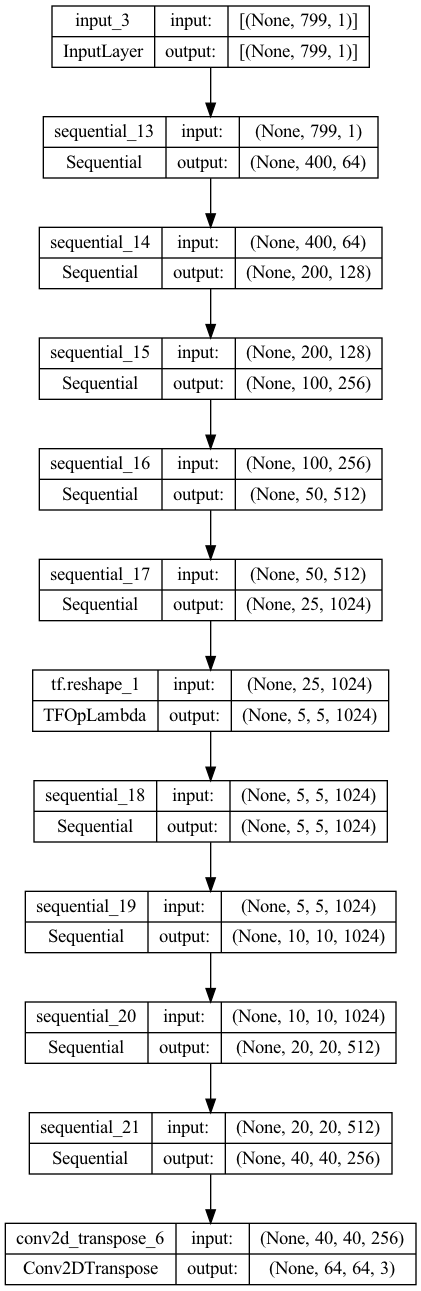

In [23]:
def Gen_StoI1D():
    inputs = layers.Input(shape=(799,1))
    x = inputs
    #ReshapeInputs = layers.Reshape(target_shape=(799,1))
    #inputs = ReshapeInputs(inputs)
    #flatten = layers.Flatten()
    #inputs = flatten(inputs)
    #print(inputs.shape)
    #ReshapeInputs = layers.Reshape(target_shape=(799))
    #inputs = ReshapeInputs(inputs)
    #first = layers.Dense(units = 64*64*3, activation='tanh')
    #x = first(inputs)
    #reshaping = layers.Reshape((64,64,3))
    #x = reshaping(x)
    # bs = batch size
    down_stack = [
        downsample1D(64, 4, apply_instancenorm=False), # (bs, 32, 32, 64)
        downsample1D(128, 4), # (bs, 16, 16, 128)
        downsample1D(256, 4), # (bs, 8, 8, 256)
        downsample1D(512, 4), # (bs, 4, 4, 512)
        downsample1D(1024, 4), # (bs, 2, 2, 512)
        #downsample1D(1024, 4), # (bs, 1, 1, 512)
    ]

    up_stack = [
        upsample(1024, (4,4), strides=1, apply_dropout=True), # (bs, 2, 2, 1024), change strides to change output size
        upsample(1024, 4, apply_dropout=True), # (bs, 4, 4, 1024)
        upsample(512, 4), # (bs, 8, 8, 1024)
        upsample(256, 4), # (bs, 16, 16, 512)
        upsample(128, 4), # (bs, 32, 32, 256)
        
    ]

    initializer = tf.random_normal_initializer(0., 0.02)
    last = layers.Conv2DTranspose(OUTPUT_CHANNELS, 25,
                                  strides=1,
                                  padding='valid',
                                  kernel_initializer=initializer,
                                  activation='tanh') # (bs, 256, 256, 3)
    #last = layers.Dense(
                        #units=799,
                        #activation='sigmoid',
                        #kernel_initializer=initializer)

    #x = inputs

    # Downsampling through the model
    skips = []
    for down in down_stack:
        x = down(x)
        #print(x.shape)
        #if 
        skips.append(x)

    skips = reversed(skips[:-1])

    x = tf.reshape(x, [-1,5,5,1024])

    # Upsampling and establishing the skip connections
    for up, skip in zip(up_stack, skips):
        x = up(x)
    #     print(x.shape)
        #skip = tf.reshape(skip, [-1,skip.shape[1]*skip.shape[2],])
        #x = layers.Concatenate()([x, skip])

    #Upsampling = upsample(1024,4,apply_dropout=True)
    #x = Upsampling(x)
    x = last(x)

    return keras.Model(inputs=inputs, outputs=x)

Shape_1D = Gen_StoI1D()

plot_model(Shape_1D, to_file='discriminator_example_plot.png', show_shapes=True, show_layer_names=True)

In [24]:
OUTPUT_CHANNELS=3 

def Generator_Image_To_Spectrum():
    inputs = layers.Input(shape=(64,64,3))

    # bs = batch size
    down_stack = [
        downsample(64, 4, apply_instancenorm=False), # (bs, 32, 32, 64)
        downsample(128, 4), # (bs, 16, 16, 128)
        downsample(256, 4), # (bs, 8, 8, 256)
        downsample(512, 4), # (bs, 4, 4, 512)
        downsample(1024, 4), # (bs, 2, 2, 512)
        downsample(1024, 4), # (bs, 1, 1, 512)
    ]
    
    up_stack = [
        upsample(1024, 4, apply_dropout=True), # (bs, 2, 2, 1024)
        upsample(1024, 4, apply_dropout=True), # (bs, 4, 4, 1024)
        upsample(512, 4, apply_dropout=True), # (bs, 4, 4, 1024)
        upsample(512, 4), # (bs, 8, 8, 1024)
        upsample(256, 4), # (bs, 16, 16, 512)
        upsample(128, 4), # (bs, 32, 32, 256)
        upsample(64, 4), # (bs, 64, 64, 128)
    ]

    initializer = tf.random_normal_initializer(0., 0.02)
    secondlast = layers.Flatten()
    last = layers.Conv2DTranspose(OUTPUT_CHANNELS, 4,
                                  strides=2,
                                  padding='same',
                                  kernel_initializer=initializer,
                                  activation='tanh') # (bs, 256, 256, 3)
    last = layers.Dense(
                        units=799,
                        activation='tanh',
                        kernel_initializer=initializer)

    x = inputs
    
    thirdlast = upsample(32,4)

    # Downsampling through the model
    skips = []
    for down in down_stack:
        x = down(x)
        skips.append(x)

    skips = reversed(skips[:-1])

    # Upsampling and establishing the skip connections
    for up, skip in zip(up_stack, skips):
        x = up(x)
        x = layers.Concatenate()([x, skip])

    #x = thirdlast(x)
    
    x = secondlast(x)
    x = last(x)
    Reshapeoutputs = layers.Reshape(target_shape=(799,1))
    x = Reshapeoutputs(x)

    return keras.Model(inputs=inputs, outputs=x)

# def Generator_Spectrum_To_Image_1D():
#     inputs = layers.Input(shape=(799,1))

#     down_stack = [
#         downsample1D(64,4,apply_instancenorm=False),
#         downsample1D(128,4),
#         downsample1D(256,4),
#         downsample1D(512,4),
#         downsample1D(1024,4),
#         downsample1D(1024,4)
#     ]

#     up_stack = [
#         upsample(1024, 4, apply_dropout=True), # (bs, 2, 2, 1024)
#         upsample(1024, 4, apply_dropout=True), # (bs, 4, 4, 1024)
#         upsample(512, 4), # (bs, 8, 8, 1024)
#         upsample(256, 4), # (bs, 16, 16, 512)
#         upsample(128, 4), # (bs, 32, 32, 256)
#     ]

#     x = inputs
#     initializer = tf.random_normal_initializer(0., 0.02)
#     last = layers.Conv2DTranspose(OUTPUT_CHANNELS, 4,
#                                   strides=2,
#                                   padding='same',
#                                   kernel_initializer=initializer,
#                                   activation='tanh') # (bs, 256, 256, 3)

#     skips = []
#     for down in down_stack:
#         x = down(x)
#         skips.append(x)

#     skips = reversed(skips[:-1])

#     for up in up_stack:
#         x = up(x)
#     # Upsampling and establishing the skip connections
#     # for up, skip in zip(up_stack, skips):
#     #     x = up(x)
#     #     x = layers.Concatenate()([x, skip])

#     x = last(x)
#     return keras.Model(inputs=inputs, outputs=x)

# tesgentospecgreyscale = Generator_Spectrum_To_Image_1D()
# plot_model(tesgentospecgreyscale, to_file='greyscalespectrumgenerator.png', show_shapes=True, show_layer_names=True)

def Generator_Spectrum_To_Image():
    inputs = layers.Input(shape=(799,1))
    #ReshapeInputs = layers.Reshape(target_shape=(799,1))
    #inputs = ReshapeInputs(inputs)
    flatten = layers.Flatten()
    inputs = flatten(inputs)
    #print(inputs.shape)
    #ReshapeInputs = layers.Reshape(target_shape=(799))
    #inputs = ReshapeInputs(inputs)
    first = layers.Dense(units = 64*64*3, activation='tanh')
    x = first(inputs)
    reshaping = layers.Reshape((64,64,3))
    x = reshaping(x)
    # bs = batch size
    down_stack = [
        downsample(64, 4, strides=2,apply_instancenorm=False), # (bs, 32, 32, 64)
        downsample(128, 4), # (bs, 16, 16, 128)
        downsample(256, 4), # (bs, 8, 8, 256)
        downsample(512, 4), # (bs, 4, 4, 512)
        downsample(1024, 4), # (bs, 2, 2, 512)
        downsample(1024, 4), # (bs, 1, 1, 512)
    ]

    up_stack = [
        upsample(1024, 4, apply_dropout=True), # (bs, 2, 2, 1024)
        upsample(1024, 4, apply_dropout=True), # (bs, 4, 4, 1024)
        upsample(512, 4), # (bs, 8, 8, 1024)
        upsample(256, 4), # (bs, 16, 16, 512)
        upsample(128, 4), # (bs, 32, 32, 256)
        
    ]

    initializer = tf.random_normal_initializer(0., 0.02)
    last = layers.Conv2DTranspose(OUTPUT_CHANNELS, 4,
                                  strides=2,
                                  padding='same',
                                  kernel_initializer=initializer,
                                  activation='tanh') # (bs, 256, 256, 3)
    #last = layers.Dense(
                        #units=799,
                        #activation='sigmoid',
                        #kernel_initializer=initializer)

    #x = inputs

    # Downsampling through the model
    skips = []
    for down in down_stack:
        x = down(x)
        skips.append(x)

    skips = reversed(skips[:-1])

    # Upsampling and establishing the skip connections
    for up, skip in zip(up_stack, skips):
        x = up(x)
        x = layers.Concatenate()([x, skip])

    x = last(x)

    return keras.Model(inputs=inputs, outputs=x)





In [25]:
OUTPUT_CHANNELS=3 

# def downsample(filters, size, strides=2, apply_instancenorm=True):
#     """Defines a downsampling operation with an amount of filters, size of the kernel
#     The result goes through a 2D Convolutional Layer, instance normalization is then applied, and activation layer"""
#     initializer = tf.random_normal_initializer(0.,0.02) #Used to generate tensors with a normal distribution
#     gamma_init = keras.initializers.RandomNormal(mean=0.0,stddev=0.02) #
    
#     result = keras.Sequential()
#     result.add(layers.Conv2D(filters, size, strides=strides, kernel_initializer=initializer, use_bias=False, padding='same',))
    
#     if apply_instancenorm:
#         result.add(tfa.layers.InstanceNormalization(gamma_initializer=gamma_init))
        
#     result.add(layers.LeakyReLU())
    
#     return result 


# def upsample(filters, size, strides=2, apply_dropout=False):
#     initializer = tf.random_normal_initializer(0., 0.02)
#     gamma_init = keras.initializers.RandomNormal(mean=0.0, stddev=0.02)

#     result = keras.Sequential()
#     result.add(layers.Conv2DTranspose(filters, size, strides=strides,
#                                       padding='same',
#                                       kernel_initializer=initializer,
#                                       use_bias=False))

#     result.add(tfa.layers.InstanceNormalization(gamma_initializer=gamma_init))

#     if apply_dropout:
#         result.add(layers.Dropout(0.5))

#     result.add(layers.ReLU())

#     return result

def upsample1D(filters, size, strides=2, apply_dropout=False):
    initializer = tf.random_normal_initializer(0.,0.02)
    gamma_init = keras.initializers.RandomNormal(mean=0.0, stddev=0.02)

    result = keras.Sequential()
    result.add(layers.Conv1DTranspose(filters, size, strides=strides,
                                        padding='same',
                                        kernel_initializer=initializer,
                                        use_bias=False))

    result.add(tfa.layers.InstanceNormalization(gamma_initializer=gamma_init))

    if apply_dropout:
        result.add(layers.Dropout(0.5))

    result.add(layers.ReLU())

    return result

def downsample1D(filters, size, strides=2, apply_instancenorm=True):
    initializer = tf.random_normal_initializer(0.,0.02) #Used to generate tensors with a normal distribution
    gamma_init = keras.initializers.RandomNormal(mean=0.0,stddev=0.02) #
    
    result = keras.Sequential()
    result.add(layers.Conv1D(filters, size, strides=strides, kernel_initializer=initializer, use_bias=False, padding='same',))
    
    if apply_instancenorm:
        result.add(tfa.layers.InstanceNormalization(gamma_initializer=gamma_init))
        
    result.add(layers.LeakyReLU())
    
    return result 

def Generator_Image_To_Spectrum_1D():
    inputs = layers.Input(shape=(64,64,3))

    # bs = batch size
    down_stack = [
        downsample(64, 4, apply_instancenorm=False), # (bs, 32, 32, 64)
        downsample(128, 4), # (bs, 16, 16, 128)
        downsample(256, 4), # (bs, 8, 8, 256)
        downsample(512, 4), # (bs, 4, 4, 512)
        downsample(1024, 4), # (bs, 2, 2, 512)
        downsample(2048, 4), # (bs, 1, 1, 512)
    ]
    
    up_stack = [
        upsample1D(2048, 4, apply_dropout=True), # (bs, 2, 2, 1024)
        upsample1D(1024, 4, apply_dropout=True), # (bs, 4, 4, 1024)
        upsample1D(512, 4, apply_dropout=True), # (bs, 4, 4, 1024)
        upsample1D(512, 4), # (bs, 8, 8, 1024)
        upsample1D(256, 4), # (bs, 16, 16, 512)
        upsample1D(128, 4), # (bs, 32, 32, 256)
        upsample1D(64, 4), # (bs, 64, 64, 128)
    ]

    initializer = tf.random_normal_initializer(0., 0.02)
    secondlast = layers.Flatten()
    last = layers.Conv2DTranspose(OUTPUT_CHANNELS, 4,
                                  strides=2,
                                  padding='same',
                                  kernel_initializer=initializer,
                                  activation='tanh') # (bs, 256, 256, 3)
    last = layers.Dense(
                        units=799,
                        activation='tanh',
                        kernel_initializer=initializer)

    x = inputs
    
    thirdlast = upsample(32,4)

    # Downsampling through the model
    skips = []
    index = 5
    for down in down_stack:
        x = down(x)
        y = layers.Flatten()(x)
        print(y.shape)
        y = tf.reshape(y, [-1,1,y.shape[1]])
        print(f'shape of skip after reshaping = {y.shape}')
        skips.append(y)
        index -= 1

    #print(x.shape)
    x = layers.Flatten()(x)
    #print(x.shape)
    skips = reversed(skips[:-1]) #reverses the list to concatenate the upsample and reversed list 
    x = tf.reshape(x, [-1,1,x.shape[1]])
    print(x.shape)
    for skip in skips:
        x = layers.Concatenate()([x,skip])
        break

    print(x.shape)

    
    # x = layers.Conv1DTranspose(8,4,strides=2,
    #                                     padding='same',
    #                                     kernel_initializer=initializer,
    #                                     use_bias=False)(x)
                                        
    #x = tfa.layers.InstanceNormalization(gamma_initializer=gamma_init)(x)
    #x = upsample1D(8,4,apply_dropout=False)(x)
    for up, skip in zip(up_stack, skips):
        print(f'Shape of skip given by {skip.shape}')
        #x = layers.Concatenate()([x,skip])
        x = up(x)
        print(x.shape)
        
    #print(skips)
    # Upsampling and establishing the skip connections
    # for up, skip in zip(up_stack, skips):
    #     x = up(x)
    #     x = layers.Concatenate()([x, skip])

    #x = thirdlast(x)
    
    x = secondlast(x)
    x = last(x)
    Reshapeoutputs = layers.Reshape(target_shape=(799,1))
    x = Reshapeoutputs(x)

    return keras.Model(inputs=inputs, outputs=x)


# def Generator_Image_To_Spectrum_1D_greyscale():
#     inputs = layers.Input(shape=(64,64,1))

#     # bs = batch size
#     down_stack = [
#         downsample(64, 4, apply_instancenorm=False), # (bs, 32, 32, 64)
#         downsample(128, 4), # (bs, 16, 16, 128)
#         downsample(256, 4), # (bs, 8, 8, 256)
#         downsample(512, 4), # (bs, 4, 4, 512)
#         downsample(1024, 4), # (bs, 2, 2, 512)
#         downsample(1024, 4), # (bs, 1, 1, 512)
#     ]
    
#     up_stack = [
#         upsample1D(1024, 4, apply_dropout=True), # (bs, 2, 2, 1024)
#         upsample1D(4096, 4, apply_dropout=True), # (bs, 4, 4, 1024)
#         upsample1D(8192, 4, apply_dropout=True), # (bs, 4, 4, 1024)
#         upsample1D(16384, 4), # (bs, 8, 8, 1024)
#         upsample1D(256, 4), # (bs, 16, 16, 512)
#         upsample1D(128, 4), # (bs, 32, 32, 256)
#         upsample1D(64, 4), # (bs, 64, 64, 128)
#     ]

#     initializer = tf.random_normal_initializer(0., 0.02)
#     secondlast = layers.Flatten()
#     last = layers.Conv2DTranspose(OUTPUT_CHANNELS, 4,
#                                   strides=2,
#                                   padding='same',
#                                   kernel_initializer=initializer,
#                                   activation='tanh') # (bs, 256, 256, 3)
#     last = layers.Dense(
#                         units=799,
#                         activation='tanh',
#                         kernel_initializer=initializer)

#     x = inputs
    
#     #thirdlast = upsample(32,4)

#     # Downsampling through the model
#     skips = []
#     index = 5
#     count = 0
#     for down in down_stack:
#         x = down(x)
#         y = layers.Flatten()(x)
#         #print(y.shape)
#         y = tf.reshape(y, [-1,1,y.shape[1]])
#         print(y.shape)
#         #print(f'shape of skip after reshaping = {y.shape}')
#         skips.append(y)
#         count += 1

#     #print(x.shape)
#     x = layers.Flatten()(x)
#     #print(x.shape)
#     #print(skips[2])
    
#     #skips = reversed(skips[:-1]) #reverses the list to concatenate the upsample and reversed list 
#     x = tf.reshape(x, [-1,1,x.shape[1]])

#     #x = up_stack[0](x)

#     x = up_stack[0](x)
#     x = layers.Concatenate(axis=-2)([x,skips[5]])
#     x = up_stack[1](x)
#     x = layers.Concatenate(axis=-2)([x,skips[4]])
#     x = up_stack[2](x)
#     x = layers.Concatenate(axis=-2)([x,skips[3]])
#     x = up_stack[3](x)
#     x = up_stack[4](x)
#     x = up_stack[5](x)


#     #x = layers.Concatenate(axis=-1)([x,skips[5]])
#     #x = layers.Concatenate(axis=-1)([x,skips[4]])
#     #print(x.shape)
#     #count = 0
#     #for up, skip in zip(up_stack,skips):
#         #x = up(x)
#         #if count > 2:
#         #x = layers.Concatenate(axis=-1)([x,skip])
#         #count += 1



    
#     # x = layers.Conv1DTranspose(8,4,strides=2,
#     #                                     padding='same',
#     #                                     kernel_initializer=initializer,
#     #                                     use_bias=False)(x)
                                        
#     #x = tfa.layers.InstanceNormalization(gamma_initializer=gamma_init)(x)
#     #x = upsample1D(8,4,apply_dropout=False)(x)
#     #for up, skip in zip(up_stack, skips):
#         #print(f'Shape of skip given by {skip.shape}')
#         #x = layers.Concatenate()([x,skip])
#         #x = up(x)
#         #print(x.shape)
        
#     #print(skips)
#     # Upsampling and establishing the skip connections
#     # for up, skip in zip(up_stack, skips):
#     #     x = up(x)
#     #     x = layers.Concatenate()([x, skip])

#     #x = thirdlast(x)
    
#     #downsample1Dapply = downsample1D(1024, 4, strides=4, apply_instancenorm=True)

#     x = secondlast(x)

#     # for down in down_stack:
#     #     x = down(x)


#     x = last(x)
#     Reshapeoutputs = layers.Reshape(target_shape=(799,1))
#     x = Reshapeoutputs(x)

#     return keras.Model(inputs=inputs, outputs=x)

# tesgentospecgreyscale = Generator_Image_To_Spectrum_1D_greyscale()
# plot_model(tesgentospecgreyscale, to_file='greyscalespectrumgenerator.png', show_shapes=True, show_layer_names=True)

#testgentospec = Generator_Image_To_Spectrum_1D()
#plot_model(testgentospec, to_file='discriminator_example_plot.png', show_shapes=True, show_layer_names=True)

In [26]:
def Discriminator():
    initializer = tf.random_normal_initializer(0., 0.02)
    gamma_init = keras.initializers.RandomNormal(mean=0.0, stddev=0.02)
    
    inp = layers.Input(shape=[256, 256, 3], name='input_image')
    
    x = inp

    down1 = downsample(64, 4, apply_instancenorm=False)(x) # (bs, 128, 128, 64)
    down2 = downsample(128, 4)(down1) # (bs, 64, 64, 128)
    down3 = downsample(256, 4)(down2) # (bs, 32, 32, 256)

    zero_pad1 = layers.ZeroPadding2D()(down3) # (bs, 34, 34, 256)
    conv = layers.Conv2D(512, 4, strides=1,
                         kernel_initializer=initializer,
                         use_bias=False)(zero_pad1) # (bs, 31, 31, 512)

    norm1 = tfa.layers.InstanceNormalization(gamma_initializer=gamma_init)(conv)

    leaky_relu = layers.LeakyReLU()(norm1)

    zero_pad2 = layers.ZeroPadding2D()(leaky_relu) # (bs, 33, 33, 512)

    last = layers.Conv2D(1, 4, strides=1,
                         kernel_initializer=initializer)(zero_pad2) # (bs, 30, 30, 1)

    return tf.keras.Model(inputs=inp, outputs=last)

In [27]:
def Discriminator_Image_To_Spectrum():
    initializer = tf.random_normal_initializer(0., 0.02)
    gamma_init = keras.initializers.RandomNormal(mean=0.0, stddev=0.02)
    
    inp = layers.Input(shape=(64, 64, 3), name='input_image')
    
    x = inp

    down1 = downsample(64, 4, apply_instancenorm=False)(x) # (bs, 32, 32, 64)
    down2 = downsample(128, 4)(down1) # (bs, 16, 16, 128)
    down3 = downsample(256, 4)(down2) # (bs, 8, 8, 256)

    zero_pad1 = layers.ZeroPadding2D()(down3) # (bs, 10, 10, 256)
    conv = layers.Conv2D(512, 4, strides=1,
                         kernel_initializer=initializer,
                         use_bias=False)(zero_pad1) # (bs, 7, 7, 512)

    norm1 = tfa.layers.InstanceNormalization(gamma_initializer=gamma_init)(conv)

    leaky_relu = layers.LeakyReLU()(norm1)
    leaky_relu = layers.Dropout(0.5)(leaky_relu)
    zero_pad2 = layers.ZeroPadding2D()(leaky_relu) # (bs, 9, 9, 512)

    last = layers.Conv2D(1, 4, strides=1,
                         kernel_initializer=initializer)(zero_pad2) # (bs, 6, 6, 1)

    return tf.keras.Model(inputs=inp, outputs=last)

def Discriminator_Spectrum_To_Image():
    initializer = tf.random_normal_initializer(0., 0.02)
    gamma_init = keras.initializers.RandomNormal(mean=0.0, stddev=0.02)
    
    inp = layers.Input(shape=(799,1), name='input_spectrum')
    inp = layers.Reshape((799,))(inp)
    first = layers.Dense(units = 64*64*3, activation='sigmoid')
    
    x = inp
    x = first(x)
    reshaping = layers.Reshape((64,64,3))
    x = reshaping(x)

    down1 = downsample(64, 4, apply_instancenorm=False)(x) # (bs, 32, 32, 64)
    down2 = downsample(128, 4)(down1) # (bs, 16, 16, 128)
    down3 = downsample(256, 4)(down2) # (bs, 8, 8, 256)

    zero_pad1 = layers.ZeroPadding2D()(down3) # (bs, 10, 10, 256)
    conv = layers.Conv2D(512, 4, strides=1,
                         kernel_initializer=initializer,
                         use_bias=False)(zero_pad1) # (bs, 7, 7, 512)

    norm1 = tfa.layers.InstanceNormalization(gamma_initializer=gamma_init)(conv)

    leaky_relu = layers.LeakyReLU()(norm1)

    zero_pad2 = layers.ZeroPadding2D()(leaky_relu) # (bs, 9, 9, 512)

    last = layers.Conv2D(1, 4, strides=1,
                         kernel_initializer=initializer)(zero_pad2) # (bs, 6, 6, 1)

    return tf.keras.Model(inputs=inp, outputs=last)


    

In [28]:
def Discriminator_Image_To_Spectrum_Gaussian():
    initializer = tf.random_normal_initializer(0., 0.02)
    gamma_init = keras.initializers.RandomNormal(mean=0.0, stddev=0.02)
    
    inp = layers.Input(shape=(64, 64, 3), name='input_image')
    
    x = inp

    down1 = downsample(64, 4, apply_instancenorm=False)(x) # (bs, 32, 32, 64)
    down2 = downsample(128, 4)(down1) # (bs, 16, 16, 128)
    down3 = downsample(256, 4)(down2) # (bs, 8, 8, 256)

    zero_pad1 = layers.ZeroPadding2D()(down3) # (bs, 10, 10, 256)
    conv = layers.Conv2D(512, 4, strides=1,
                         kernel_initializer=initializer,
                         use_bias=False)(zero_pad1) # (bs, 7, 7, 512)

    norm1 = tfa.layers.InstanceNormalization(gamma_initializer=gamma_init)(conv)

    leaky_relu = layers.LeakyReLU()(norm1)

    zero_pad2 = layers.ZeroPadding2D()(leaky_relu) # (bs, 9, 9, 512)

    gaussian = layers.GaussianNoise(0.2)(zero_pad2)
    last = layers.Conv2D(1, 4, strides=1,
                         kernel_initializer=initializer)(gaussian) # (bs, 6, 6, 1)

    return tf.keras.Model(inputs=inp, outputs=last)

def Discriminator_Spectrum_To_Image_Gaussian():
    initializer = tf.random_normal_initializer(0., 0.02)
    gamma_init = keras.initializers.RandomNormal(mean=0.0, stddev=0.02)
    
    inp = layers.Input(shape=(799,1), name='input_spectrum')
    inp = layers.Reshape((799,))(inp)
    first = layers.Dense(units = 64*64*3, activation='sigmoid')
    
    x = inp
    x = first(x)
    reshaping = layers.Reshape((64,64,3))
    x = reshaping(x)

    down1 = downsample(64, 4, apply_instancenorm=False)(x) # (bs, 32, 32, 64)
    down2 = downsample(128, 4)(down1) # (bs, 16, 16, 128)
    down3 = downsample(256, 4)(down2) # (bs, 8, 8, 256)

    zero_pad1 = layers.ZeroPadding2D()(down3) # (bs, 10, 10, 256)
    conv = layers.Conv2D(512, 4, strides=1,
                         kernel_initializer=initializer,
                         use_bias=False)(zero_pad1) # (bs, 7, 7, 512)

    norm1 = tfa.layers.InstanceNormalization(gamma_initializer=gamma_init)(conv)

    leaky_relu = layers.LeakyReLU()(norm1)

    zero_pad2 = layers.ZeroPadding2D()(leaky_relu) # (bs, 9, 9, 512)

    gaussian = layers.GaussianNoise(0.05)(zero_pad2)
    last = layers.Conv2D(1, 4, strides=1,
                         kernel_initializer=initializer)(gaussian) # (bs, 6, 6, 1)

    return tf.keras.Model(inputs=inp, outputs=last)

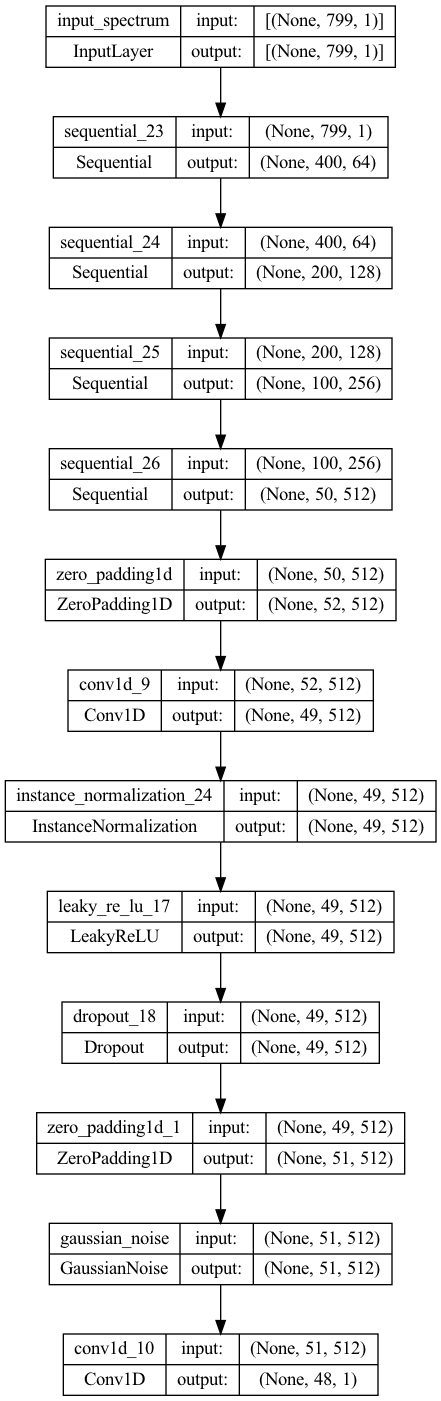

In [29]:
def Discriminator_Spectrum_To_Image_strict1D():
    initializer = tf.random_normal_initializer(0., 0.02)
    gamma_init = keras.initializers.RandomNormal(mean=0.0, stddev=0.02)
    
    inp = layers.Input(shape=(799,1), name='input_spectrum')
    first = downsample1D(64,4,apply_instancenorm=False)(inp)
    x = downsample1D(128, 4)(first)
    x = downsample1D(256,4)(x)
    x = downsample1D(512,4)(x)
    

    zero_pad1 = layers.ZeroPadding1D()(x) # (bs, 10, 10, 256)
    conv = layers.Conv1D(512, 4, strides=1,
                         kernel_initializer=initializer,
                         use_bias=False)(zero_pad1) # (bs, 7, 7, 512)

    norm1 = tfa.layers.InstanceNormalization(gamma_initializer=gamma_init)(conv)

    leaky_relu = layers.LeakyReLU()(norm1)
    leaky_relu = layers.Dropout(0.4)(leaky_relu)
    zero_pad2 = layers.ZeroPadding1D()(leaky_relu) # (bs, 9, 9, 512)

    gaussian = layers.GaussianNoise(0.2)(zero_pad2)
    last = layers.Conv1D(1, 4, strides=1,
                         kernel_initializer=initializer)(gaussian) # (bs, 6, 6, 1)

    return tf.keras.Model(inputs=inp, outputs=last)

spectral_discriminator = Discriminator_Spectrum_To_Image_strict1D()

plot_model(spectral_discriminator, to_file='discriminator_example_plot.png', show_shapes=True, show_layer_names=True)

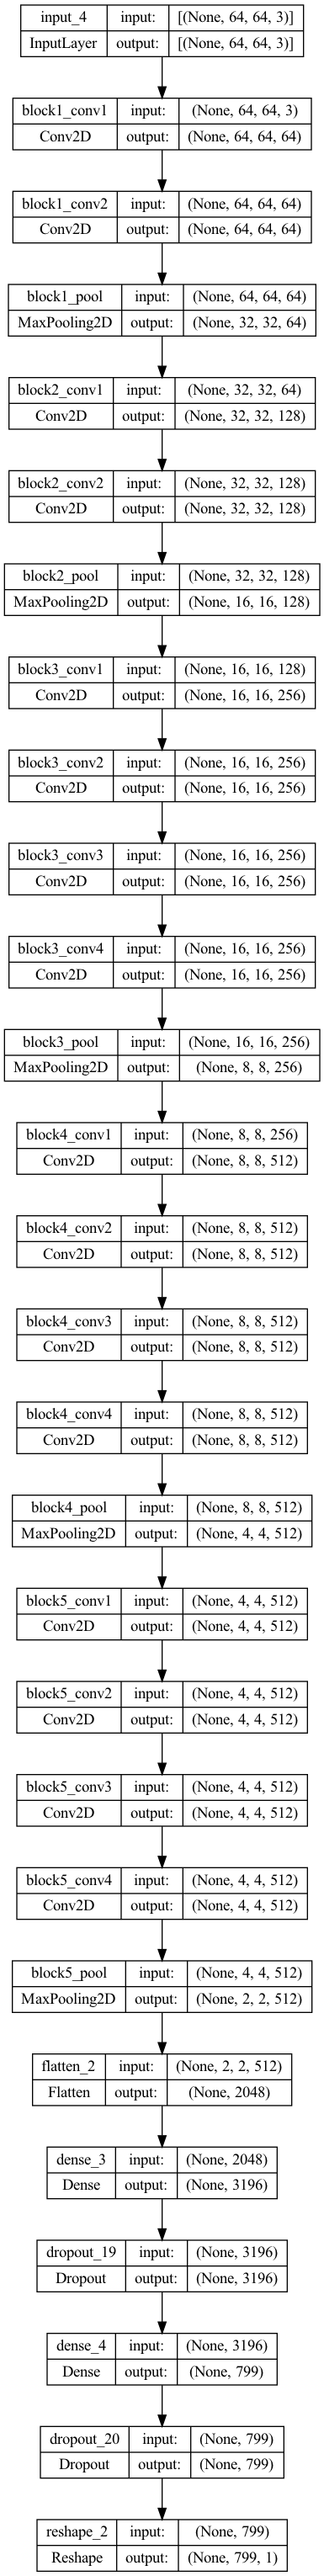

In [30]:
# spectral_generator = Generator_Image_To_Spectrum_1D()
# shape_generator = Generator_Spectrum_To_Image()
# spectral_discriminator = Discriminator_Spectrum_To_Image_Gaussian()
# shape_discriminator = Discriminator_Image_To_Spectrum_Gaussian()

spectral_generator = downsampleTFL()
shape_generator = Generator_Spectrum_To_Image()
spectral_discriminator = Discriminator_Spectrum_To_Image_strict1D()
shape_discriminator = Discriminator_Image_To_Spectrum_Gaussian()

#print(spectral_generator.summary())

from keras.models import Sequential
from keras.layers import Dense
from keras.utils.vis_utils import plot_model
plot_model(spectral_generator, to_file='discriminator_example_plot.png', show_shapes=True, show_layer_names=True)

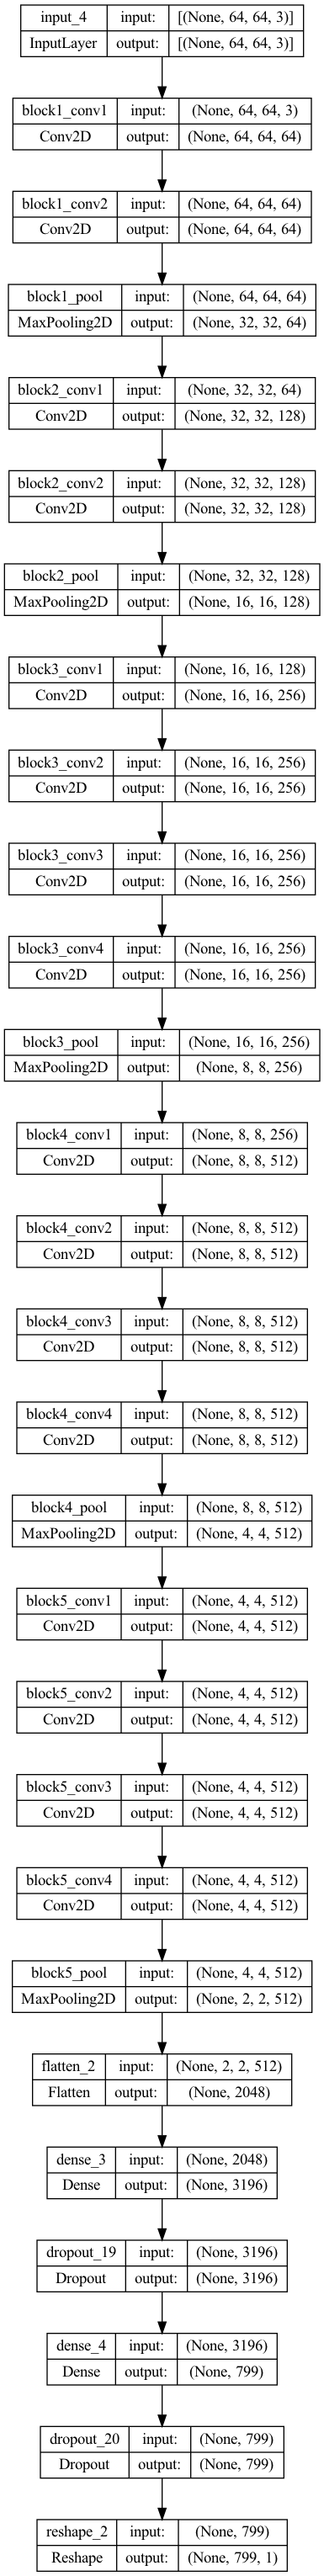

In [30]:
Image_to_spectra_generator = Generator_Image_To_Spectrum()

plot_model(spectral_generator, to_file='generator_example_plot.png', show_shapes=True, show_layer_names=True)

In [31]:
Image_to_spectra_generator.summary()

Model: "model_8"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 64, 64, 3)]  0           []                               
                                                                                                  
 sequential_45 (Sequential)     (None, 32, 32, 64)   3072        ['input_7[0][0]']                
                                                                                                  
 sequential_46 (Sequential)     (None, 16, 16, 128)  131328      ['sequential_45[0][0]']          
                                                                                                  
 sequential_47 (Sequential)     (None, 8, 8, 256)    524800      ['sequential_46[0][0]']          
                                                                                            

In [32]:
Image_to_spectra_generator.summary()


Model: "model_8"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 64, 64, 3)]  0           []                               
                                                                                                  
 sequential_45 (Sequential)     (None, 32, 32, 64)   3072        ['input_7[0][0]']                
                                                                                                  
 sequential_46 (Sequential)     (None, 16, 16, 128)  131328      ['sequential_45[0][0]']          
                                                                                                  
 sequential_47 (Sequential)     (None, 8, 8, 256)    524800      ['sequential_46[0][0]']          
                                                                                            

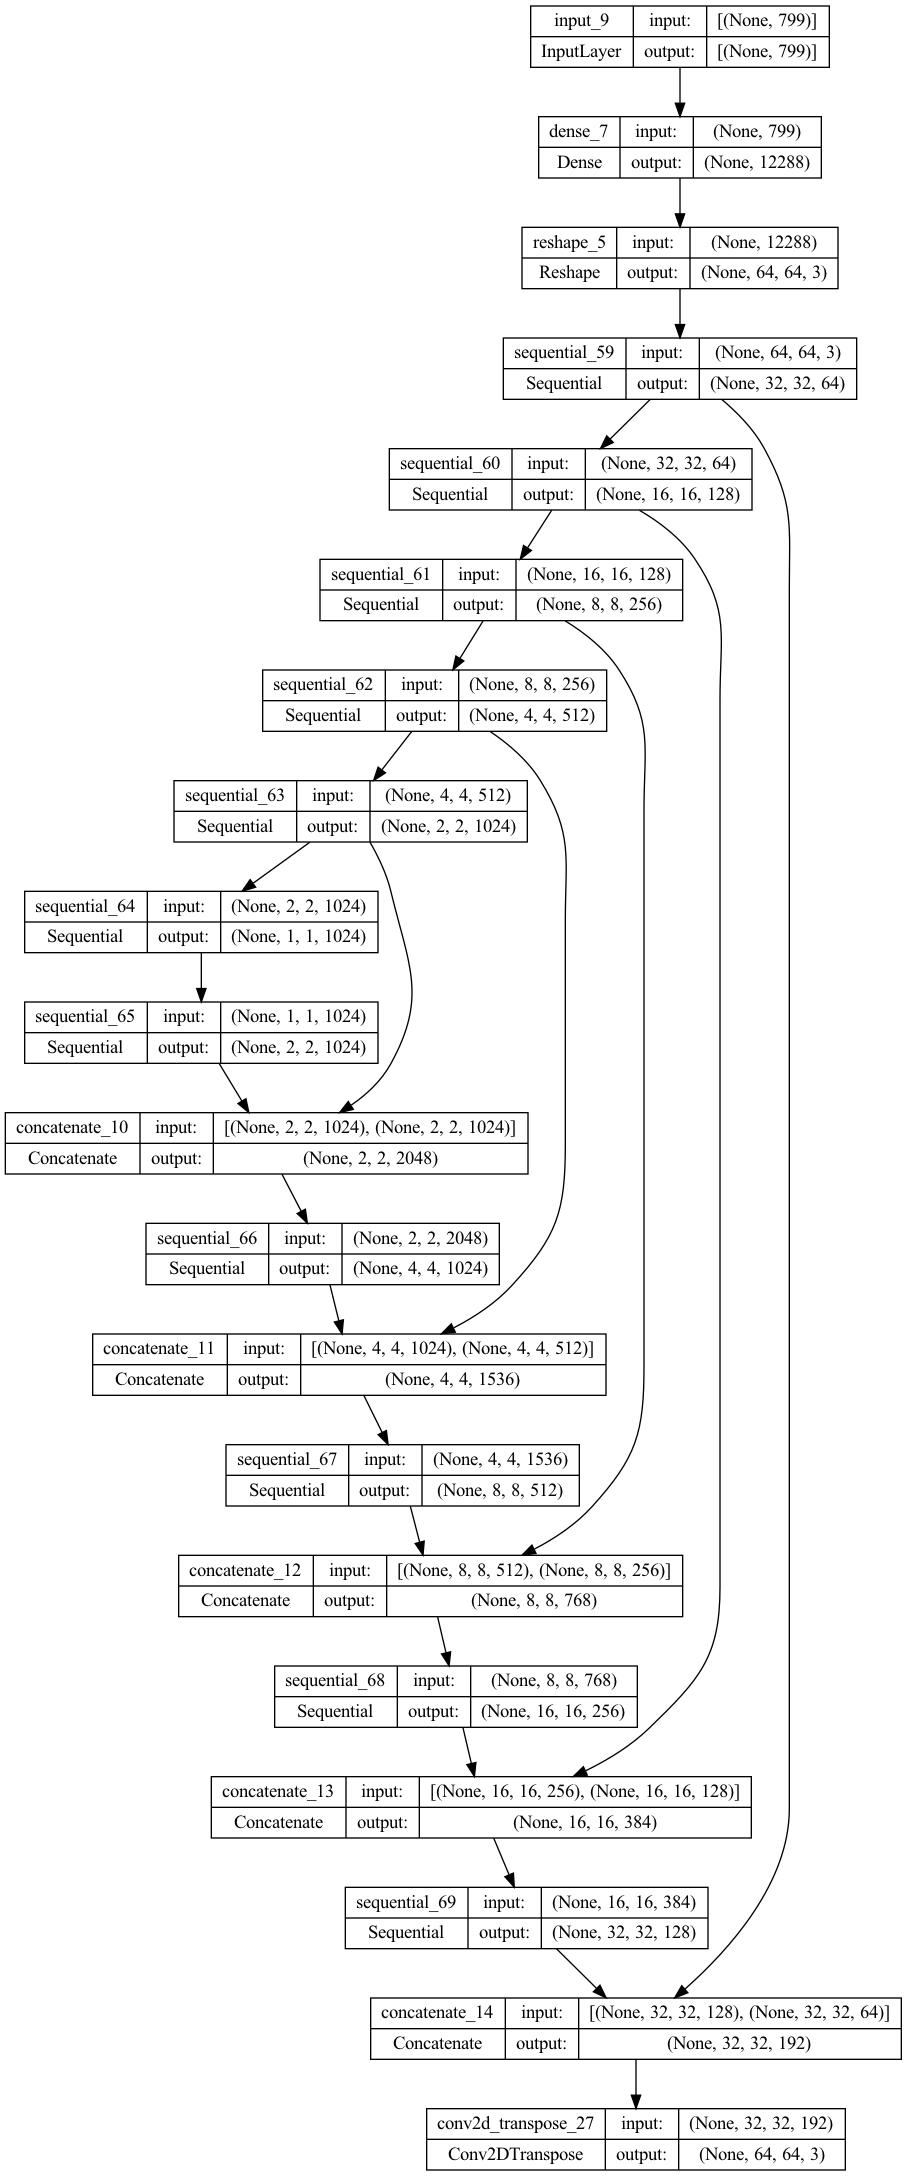

In [33]:
Spectra_to_image_generator = Generator_Spectrum_To_Image()


plot_model(Spectra_to_image_generator, to_file='generator_example_plot.png', show_shapes=True, show_layer_names=True)

In [34]:
class CycleGan(keras.Model):
    def __init__(
        self,
        spectral_generator, 
        shape_generator,
        spectral_discriminator,
        shape_discriminator,
        lambda_cycle=10,
    ):
        super(CycleGan, self).__init__()
        self.sp_gen = spectral_generator
        self.sh_gen = shape_generator
        self.sp_disc = spectral_discriminator
        self.sh_disc = shape_discriminator
        self.lambda_cycle = lambda_cycle
        self.ep = 0
        
    def compile(
        self,
        sp_gen_optimizer,
        sh_gen_optimizer,
        sp_disc_optimizer,
        sh_disc_optimizer,
        gen_loss_fn,
        disc_loss_fn,
        cycle_loss_fn,
        identity_loss_fn
    ):
        super(CycleGan, self).compile()
        self.sp_gen_optimizer = sp_gen_optimizer
        self.sh_gen_optimizer = sh_gen_optimizer
        self.sp_disc_optimizer = sp_disc_optimizer
        self.sh_disc_optimizer = sh_disc_optimizer
        self.gen_loss_fn = gen_loss_fn
        self.disc_loss_fn = disc_loss_fn
        self.cycle_loss_fn = cycle_loss_fn
        self.identity_loss_fn = identity_loss_fn
        
    def train_step(self, batch_data):
        real_spectrum, real_shape = batch_data
        self.ep += 1
        #persistent = True allows us to call gradient tape outside the loop multiple times.
        #Gradient tape watches all the computations of non constant varaibles inside its loop
        with tf.GradientTape(persistent=True) as tape:
            # photo to monet back to photo
            fake_sp = self.sp_gen(real_shape, training=True)
            cycled_sh = self.sh_gen(fake_sp, training=True)

            # monet to photo back to monet
            fake_sh = self.sh_gen(real_spectrum, training=True)
            cycled_sp = self.sp_gen(fake_sh, training=True)

            # generating itself - skip this for now as input.output shapes are different sizes
            #same_monet = self.m_gen(real_monet, training=True)
            #same_photo = self.p_gen(real_photo, training=True)

            # discriminator used to check, inputing real images
            disc_real_sp = self.sp_disc(real_spectrum, training=True)
            disc_real_sh = self.sh_disc(real_shape, training=True)

            # discriminator used to check, inputing fake images
            disc_fake_sp = self.sp_disc(fake_sp, training=True)
            disc_fake_sh = self.sh_disc(fake_sh, training=True)

            # evaluates generator loss
            sp_gen_loss = self.gen_loss_fn(disc_fake_sp)
            sh_gen_loss = self.gen_loss_fn(disc_fake_sh)

            # evaluates total cycle consistency loss
            total_cycle_loss = self.cycle_loss_fn(real_spectrum, cycled_sp, self.lambda_cycle) + self.cycle_loss_fn(real_shape, cycled_sh, self.lambda_cycle)

            # evaluates total generator loss, exclude identity loss for now 
            total_sp_gen_loss = sp_gen_loss + total_cycle_loss #+ self.identity_loss_fn(real_monet, same_monet, self.lambda_cycle)
            total_sh_gen_loss = sh_gen_loss + total_cycle_loss #+ self.identity_loss_fn(real_photo, same_photo, self.lambda_cycle)

            # evaluates discriminator loss
            sp_disc_loss = self.disc_loss_fn(disc_real_sp, disc_fake_sp)
            sh_disc_loss = self.disc_loss_fn(disc_real_sh, disc_fake_sh)

        # Calculate the gradients for generator and discriminator
        # tape.gradient calculates the gradients wrt the second variable 
        # speed up computation speed by using tape.stop_recording(): on areas where you dont need to watch the computation
        sp_generator_gradients = tape.gradient(total_sp_gen_loss,
                                                  self.sp_gen.trainable_variables)
        sh_generator_gradients = tape.gradient(total_sh_gen_loss,
                                                  self.sh_gen.trainable_variables)

        sp_discriminator_gradients = tape.gradient(sp_disc_loss,
                                                      self.sp_disc.trainable_variables)
        sh_discriminator_gradients = tape.gradient(sh_disc_loss,
                                                      self.sh_disc.trainable_variables)

        # Apply the gradients to the optimizer
        self.sp_gen_optimizer.apply_gradients(zip(sp_generator_gradients,
                                                 self.sp_gen.trainable_variables))

        self.sh_gen_optimizer.apply_gradients(zip(sh_generator_gradients,
                                                 self.sh_gen.trainable_variables))

        self.sp_disc_optimizer.apply_gradients(zip(sp_discriminator_gradients,
                                                  self.sp_disc.trainable_variables))

        self.sh_disc_optimizer.apply_gradients(zip(sh_discriminator_gradients,
                                                  self.sh_disc.trainable_variables))
        
#         if self.ep % 1 == 0:
#             self.sp_gen.save(f'Model_ShtoSp{self.ep}')
#             self.sh_gen.save(f'Model_SptoSh{self.ep}')
        
        
        return {
            "total_spectrum_gen_loss": total_sp_gen_loss,
            "total_shape_gen_loss": total_sh_gen_loss,
            "spectrum_disc_loss": sp_disc_loss,
            "shape_disc_loss": sh_disc_loss
        }


In [35]:

def discriminator_loss(real, generated):
    real_loss = tf.keras.losses.BinaryCrossentropy(from_logits=True, reduction=tf.keras.losses.Reduction.NONE)(tf.ones_like(real), real)

    generated_loss = tf.keras.losses.BinaryCrossentropy(from_logits=True, reduction=tf.keras.losses.Reduction.NONE)(tf.zeros_like(generated), generated)

    total_disc_loss = real_loss + generated_loss

    return total_disc_loss * 0.5

def generator_loss(generated):
        return tf.keras.losses.BinaryCrossentropy(from_logits=True, reduction=tf.keras.losses.Reduction.NONE)(tf.ones_like(generated), generated)

def calc_cycle_loss(real_image, cycled_image, LAMBDA):
        loss1 = tf.reduce_mean(tf.abs(tf.cast(real_image,tf.float32) - tf.cast(cycled_image,tf.float32)))

        return LAMBDA * loss1
    
def identity_loss(real_image, same_image, LAMBDA):
        loss = tf.reduce_mean(tf.abs(real_image - same_image))
        return LAMBDA * 0.5 * loss
    


In [4]:
sp_generator_optimizer = tf.keras.optimizers.Adam(2e-4, beta_1=0.5)
sh_generator_optimizer = tf.keras.optimizers.Adam(2e-4, beta_1=0.5)

sp_discriminator_optimizer = tf.keras.optimizers.Adam(1e-4, beta_1=0.5)
sh_discriminator_optimizer = tf.keras.optimizers.Adam(2e-4, beta_1=0.5)


In [5]:
class EpochModelCheckpoint(tf.keras.callbacks.ModelCheckpoint):

    def __init__(self,
                 filepath,
                 frequency=1,
                 monitor='total_shape_gen_loss',
                 verbose=0,
                 save_best_only=False,
                 save_weights_only=False,
                 mode='auto',
                 options=None,
                 **kwargs):
        super(EpochModelCheckpoint, self).__init__(filepath, monitor, verbose, save_best_only, save_weights_only,
                                                   mode, "epoch", options)
        self.epochs_since_last_save = 0
        self.frequency = frequency

    def on_epoch_end(self, epoch, logs=None):
        self.epochs_since_last_save += 1
        # pylint: disable=protected-access
        if self.epochs_since_last_save % self.frequency == 0:
            self._save_model(epoch=epoch, batch=None, logs=logs)

    def on_train_batch_end(self, batch, logs=None):
        pass
    
callbacks_class=[
     EpochModelCheckpoint("/your_save_location/epoch{epoch:02d}", frequency=3),
]


In [6]:
sp_generator_optimizer = tf.keras.optimizers.Adam(2e-4, beta_1=0.5)
sh_generator_optimizer = tf.keras.optimizers.Adam(2e-4, beta_1=0.5)

sp_discriminator_optimizer = tf.keras.optimizers.Adam(1e-4, beta_1=0.5)
sh_discriminator_optimizer = tf.keras.optimizers.Adam(2e-4, beta_1=0.5)

df = pd.read_csv('absorptionData_HybridGAN.csv',index_col=0).astype('float')
testlistn = df.iloc[:].to_numpy()
dataType = testlistn.dtype

shape_ds = load_dataset(SHAPE_FILENAMES, HEIGHT=IMAGE_SIZE[0], WIDTH=IMAGE_SIZE[1], CHANNELS=1)
spectral_ds = load_spectral_dataset(SPECTRAL_FILENAMES)

spectral_generator = keras.models.load_model("Spectral_Gen_45epoch_Modified1D_Ver.h5")
shape_generator = keras.models.load_model("Shape_Gen_45epoch_Gauss1D_Ver.h5")
spectral_discriminator = keras.models.load_model("Spectral_Disc_45epoch_Modified1D_Ver.h5")
shape_discriminator = keras.models.load_model('Shape_Disc_45epoch_Gauss1D_Ver.h5')

Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



2023-01-13 14:06:39.756090: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-01-13 14:06:39.757653: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [44]:
cycle_gan_model = CycleGan(
    spectral_generator, shape_generator, spectral_discriminator, shape_discriminator
    )

cycle_gan_model.compile(
    sp_gen_optimizer = sp_generator_optimizer,
    sh_gen_optimizer = sh_generator_optimizer,
    sp_disc_optimizer = sp_discriminator_optimizer,
    sh_disc_optimizer = sh_discriminator_optimizer,
    gen_loss_fn = generator_loss,
    disc_loss_fn = discriminator_loss,
    cycle_loss_fn = calc_cycle_loss,
    identity_loss_fn = identity_loss
    )

#spdr = spectral_ds.repeat(count=50)
#shdr = shape_ds.repeat(count=50)

filepath = "model.h5"
checkpoint_list = tf.keras.callbacks.ModelCheckpoint(filepath, monitor='loss', verbose=1, save_best_only=True, mode='min')

history = cycle_gan_model.fit(tf.data.Dataset.zip((spectral_ds, shape_ds)),
          epochs=25, 
          #steps_per_epoch=(18770-64)//BATCH_SIZE,
          #callbacks=checkpoint_list,
                             )
          #validation_data=(test_images,test_labels),


# for i in range(10):
#     history = cycle_gan_model.fit(
#         tf.data.Dataset.zip((spectral_ds, shape_ds)),
#         epochs=2,
#         steps_per_epoch=18770//BATCH_SIZE,
#     )
    
#     cycle_gan_model.sp_gen.save(f'Model_ShtoSp{i*2 + 2}')
#     cycle_gan_model.sh_gen.save(f'Model_SptoSh{i*2 + 2}')

Epoch 1/25


KeyboardInterrupt: 

In [ ]:
print(history.history)

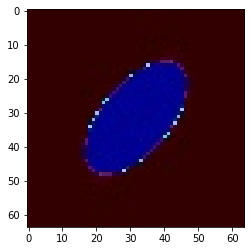

In [48]:
for i, img in enumerate(shape_ds.take(5)):
    prediction = spectral_generator(img, training=False)[0].numpy()
    prediction = (prediction*127.5 + 127.5).astype(np.uint8)
    img = (img[0]*127.5 + 127.5).numpy().astype(np.uint8)
    plt.imshow(img)

In [ ]:
spectral_generator.summary()

In [ ]:
spectral_generator = Generator_Image_To_Spectrum_1D()
shape_generator = Generator_Spectrum_To_Image()
spectral_discriminator = Discriminator_Spectrum_To_Image()
shape_discriminator = Discriminator_Image_To_Spectrum()

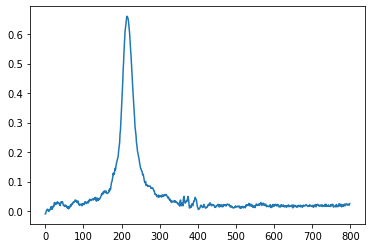

In [8]:
#_, ax = plt.subplots(5, 2, figsize=(12, 12))
for i, img in enumerate(shape_ds.take(1)): #add shuffle here for random selection 
    prediction = spectral_generator(img, training=False)[0].numpy()
    #prediction = (prediction * 127.5 + 127.5).astype(np.uint8)
    #img = (img[0] * 127.5 + 127.5).numpy().astype(np.uint8)
    #plt.imshow(img[0])
    plt.plot(range(len(prediction)),prediction)
#     ax[i, 0].imshow(img)
#     ax[i, 1].imshow(prediction)
#     ax[i, 0].set_title("Input Photo")
#     ax[i, 1].set_title("Monet-esque")
#     ax[i, 0].axis("off")
#     ax[i, 1].axis("off")
plt.show()

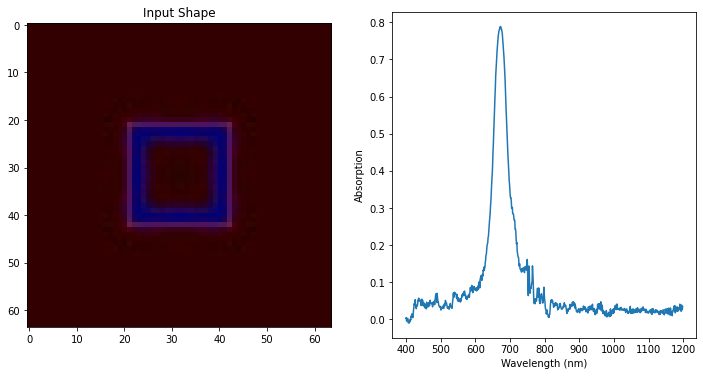

In [87]:
_, ax = plt.subplots(1, 2, figsize=(12, 6))
for i, img in enumerate(shape_ds.take(1)): #add shuffle here for random selection 
    prediction = spectral_generator(img, training=False)[0].numpy()
    #prediction = (prediction).astype(np.uint8)
    img = (img[0] * 127.5 + 127.5).numpy().astype(np.uint8)
    ax[0].imshow(img)
    ax[1].plot(range(400,len(prediction)+400) ,prediction)
    ax[0].set_title("Input Shape")
    ax[1].set_xlabel("Wavelength (nm)")
    ax[1].set_ylabel("Absorption")
plt.show()

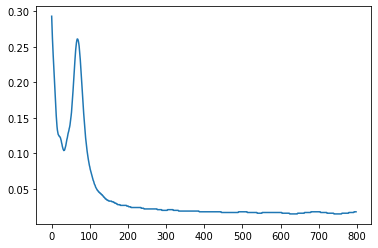

In [109]:
for i, spec in enumerate(spectral_ds.take(1)):
    plt.plot(range(len(spec[0])),spec[0])

plt.show()



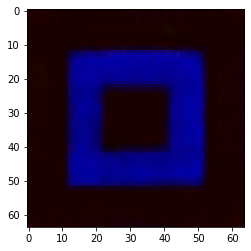

In [159]:
for i, img in enumerate(spectral_ds.take(5)):
    prediction = shape_generator(img, training=False)[0].numpy()
    prediction = (prediction * 127.5 + 127.5).astype(np.uint8)
    #img = (img[0] * 127.5 + 127.5).numpy().astype(np.uint8)
    img = img[0]
    
    #plt.imshow(img)
    #print(prediction.shape)
    plt.imshow(prediction)
    break;
plt.show()

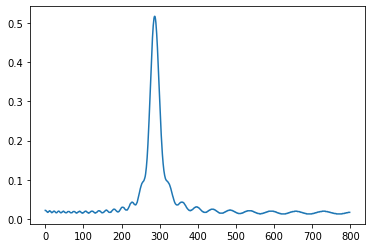

In [146]:
plt.plot(range(len(img)),img)

In [40]:
#plt.plot(img)
import cv2
from operator import add

In [151]:
%reset

Nothing done.


In [152]:
# This code block is for manual sweep
#def f(x,y):
    
import matplotlib.pyplot as plt
import tensorflow as tf
from re import L

intervalsize = 64

def fn(a,a1):
    return 0.8*(2500/((a-(500+a1))**2 + 2500))
#x1 = range(400,1199)

def fn2ndpeak(a,a1):
    return 2.9*(225/((a-(500+a1))**2+1000))

x1 = []
for i in range(400,1199):
    x1.append(i)

#print(len(list1))
a1 = []
for j in range(intervalsize):
    a1.append(j*12)


y2 = []
y4 = []
y5 = []
for i in range(intervalsize):
    y1 = [fn(x,i*12) for x in x1]
    y4 = [fn2ndpeak(x,i*12)for x in x1]
    #y1 = list(map(fn,x1,i*12))
    y2.append(y1)
    y5.append(y4)

y6 = []
for i in range(intervalsize):
    templist = list(map(add,y2[2],y5[i]))
    y6.append(templist)

y8 = []
for i in range(intervalsize):
    templist2 = list(map(add,y6[9],y5[i]))
    y8.append(templist2)

doublepeak = tf.convert_to_tensor(y6)

test_tensor = tf.convert_to_tensor(y2)

triplepeak = tf.convert_to_tensor(y8)

y3 = tf.reshape(test_tensor,[intervalsize,799,1])
y7 = tf.reshape(doublepeak,[intervalsize,799,1])
y9 = tf.reshape(triplepeak,[intervalsize,799,1])

print(y3)

tf.Tensor(
[[[0.16      ]
  [0.1625884 ]
  [0.16523464]
  ...
  [0.00410748]
  [0.00409577]
  [0.0040841 ]]

 [[0.13294336]
  [0.13494366]
  [0.1369863 ]
  ...
  [0.0042521 ]
  [0.00423976]
  [0.00422747]]

 [[0.11188185]
  [0.11344943]
  [0.11504832]
  ...
  [0.00440447]
  [0.00439146]
  [0.00437851]]

 ...

 [[0.00287884]
  [0.00288575]
  [0.00289268]
  ...
  [0.52687037]
  [0.53691274]
  [0.54704595]]

 [[0.00279784]
  [0.00280446]
  [0.0028111 ]
  ...
  [0.41631973]
  [0.42471862]
  [0.43327555]]

 [[0.00272021]
  [0.00272656]
  [0.00273293]
  ...
  [0.32786885]
  [0.33439225]
  [0.34106413]]], shape=(64, 799, 1), dtype=float32)


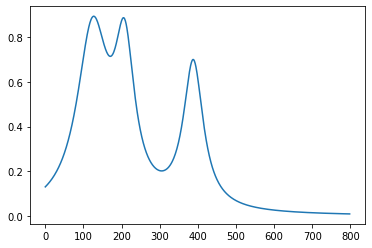

In [153]:
plt.plot(y9[24])

In [157]:
count = 0
numimages = 64
_, ax = plt.subplots(numimages, 2, figsize=(128, 256))

plotcount=0
for i in range(numimages):
    dummyprediction = shape_generator(y9,training=False)[i].numpy()
    dummyprediction = (dummyprediction * 127.5 + 127.5).astype(np.uint8)
    #plt.imshow(dummyprediction)
    if plotcount%5 == 0:
        ax[i,0].imshow(dummyprediction)
        ax[i,1].plot(y9[i])
    
    plotcount += 1
    

plt.show()
#dummyprediction = shape_generator(y3,training=False)[24].numpy()
dummyprediction = (dummyprediction * 127.5 + 127.5).astype(np.uint8)
#plt.imshow(dummyprediction)

# for i in y3:
#     #newi = tf.reshape(i,799)
#     print(i.shape)
#     if count == 0:
#         dummyprediction = shape_generator(i,training=False)[0].numpy()
#         dummyprediction = (dummyprediction * 127.5 + 127.5).astype(np.uint8)
#         plt.imshow(dummyprediction)
#         count = 1
    

In [57]:
count1 = 0

In [93]:
#_, ax = plt.subplots(5, 2, figsize=(12, 12))
numofimages = 100
storedvalues = [[] for _ in range(numofimages)]
for i, img in enumerate(spectral_ds.take(numofimages)):
    print(type(img))
    prediction = shape_generator(img, training=False)[0].numpy()
    print(prediction.shape)
    prediction = (prediction * 127.5 + 127.5).astype(np.uint8)
    #img = (img[0] * 127.5 + 127.5).numpy().astype(np.uint8)
    img = img[0]
    storedvalues[i] = img
    #ax[i, 0].plot(img)
    #ax[i, 1].imshow(prediction)
    #ax[i, 0].set_title("Input Spectrum")
    #ax[i, 1].set_title("Resulting-Shape")
    #ax[i, 0].axis("off")
    #ax[i, 1].axis("off")
    filename = 'Image'
    cv2.imwrite('./Atestimagesandgraphs/' + filename + f'_{i+count1}.png',prediction)
    graphname = 'Graph'
    np.savetxt('./Atestimagesandgraphs/' + graphname+f'_{i+count1}.csv',img)
    
plt.show()

count1 += 5


<class 'tensorflow.python.framework.ops.EagerTensor'>
(64, 64, 3)
<class 'tensorflow.python.framework.ops.EagerTensor'>
(64, 64, 3)
<class 'tensorflow.python.framework.ops.EagerTensor'>
(64, 64, 3)
<class 'tensorflow.python.framework.ops.EagerTensor'>
(64, 64, 3)
<class 'tensorflow.python.framework.ops.EagerTensor'>
(64, 64, 3)
<class 'tensorflow.python.framework.ops.EagerTensor'>
(64, 64, 3)
<class 'tensorflow.python.framework.ops.EagerTensor'>
(64, 64, 3)
<class 'tensorflow.python.framework.ops.EagerTensor'>
(64, 64, 3)
<class 'tensorflow.python.framework.ops.EagerTensor'>
(64, 64, 3)
<class 'tensorflow.python.framework.ops.EagerTensor'>
(64, 64, 3)
<class 'tensorflow.python.framework.ops.EagerTensor'>
(64, 64, 3)
<class 'tensorflow.python.framework.ops.EagerTensor'>
(64, 64, 3)
<class 'tensorflow.python.framework.ops.EagerTensor'>
(64, 64, 3)
<class 'tensorflow.python.framework.ops.EagerTensor'>
(64, 64, 3)
<class 'tensorflow.python.framework.ops.EagerTensor'>
(64, 64, 3)
<class 'te

In [ ]:
imgname = 'Image_114.png'
imgoutput = cv2.imread(imgname,2)
ret, bw_img = cv2.threshold(imgoutput, 20, 255, cv2.THRESH_BINARY)

bw = cv2.threshold(imgoutput, 127, 255, cv2.THRESH_BINARY)
  
cv2.imshow("Binary", bw_img)

cv2.imwrite(imgname + "_Binary.png",~bw_img)

In [ ]:
shape_discriminator.summary()

In [ ]:
shape_generator.save("Shape_Gen_70epoch_Gauss1D_Ver.h5")
shape_discriminator.save("Shape_Disc_70epoch_Gauss1D_Ver.h5")

In [ ]:
spectral_generator.save("Spectral_Gen_70epoch_Modified1D_Ver.h5")
spectral_discriminator.save("Spectral_Disc_70epoch_Modified1D_Ver.h5")